In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
apartments=[f"Apt_{i}" for i in range(1,21)]

In [6]:
dates=pd.date_range(start="2025-7-13",periods=30,freq="D")
total_record=len(apartments)*len(dates)

In [7]:
date={
    "Date":np.tile(dates,len(apartments)),
    "Apartment":np.repeat(apartments,len(dates)),
    "Electricity_usage":np.random.normal(loc=20,scale=5,size=len(dates)*len(apartments))
}

In [8]:
df=pd.DataFrame(date)

In [9]:
df

,Date,Apartment,Electricity_usage
0,2025-07-13,Apt_1,12.910649
1,2025-07-14,Apt_1,18.541754
2,2025-07-15,Apt_1,24.644251
3,2025-07-16,Apt_1,27.780970
4,2025-07-17,Apt_1,24.752571
...,...,...,...
595,2025-08-07,Apt_20,23.018645
596,2025-08-08,Apt_20,22.159074
597,2025-08-09,Apt_20,14.819591
598,2025-08-10,Apt_20,19.603160


In [10]:
df.dtypes

Date                 datetime64[ns]
Apartment                    object
Electricity_usage           float64
dtype: object

In [11]:
df.describe

<bound method NDFrame.describe of           Date Apartment  Electricity_usage
0   2025-07-13     Apt_1          12.910649
1   2025-07-14     Apt_1          18.541754
2   2025-07-15     Apt_1          24.644251
3   2025-07-16     Apt_1          27.780970
4   2025-07-17     Apt_1          24.752571
..         ...       ...                ...
595 2025-08-07    Apt_20          23.018645
596 2025-08-08    Apt_20          22.159074
597 2025-08-09    Apt_20          14.819591
598 2025-08-10    Apt_20          19.603160
599 2025-08-11    Apt_20          24.690164

[600 rows x 3 columns]>

In [12]:
df.describe()

,Date,Electricity_usage
count,600,600.000000
mean,2025-07-27 12:00:00,20.078085
min,2025-07-13 00:00:00,3.214065
25%,2025-07-20 00:00:00,16.507009
50%,2025-07-27 12:00:00,20.039496
75%,2025-08-04 00:00:00,23.432480
max,2025-08-11 00:00:00,34.741696
std,NaN,5.066895


In [13]:
usage_per_apartment = df.groupby("Apartment")["Electricity_usage"].sum().sort_values(ascending=False)
print(usage_per_apartment)


Apartment
Apt_12    661.919378
Apt_17    639.277233
Apt_3     627.272365
Apt_19    624.233253
Apt_5     623.536275
Apt_4     621.860542
Apt_20    614.123791
Apt_13    605.899774
Apt_16    600.801546
Apt_15    600.727111
Apt_6     600.569135
Apt_8     598.039141
Apt_18    594.271343
Apt_11    588.236262
Apt_10    587.401136
Apt_2     586.001135
Apt_7     581.773177
Apt_1     579.070136
Apt_14    574.450049
Apt_9     537.388070
Name: Electricity_usage, dtype: float64


In [14]:
usage_per_apartment=df.groupby("Apartment")["Electricity_usage"].sum()
usage_per_apartment

Apartment
Apt_1     579.070136
Apt_10    587.401136
Apt_11    588.236262
Apt_12    661.919378
Apt_13    605.899774
Apt_14    574.450049
Apt_15    600.727111
Apt_16    600.801546
Apt_17    639.277233
Apt_18    594.271343
Apt_19    624.233253
Apt_2     586.001135
Apt_20    614.123791
Apt_3     627.272365
Apt_4     621.860542
Apt_5     623.536275
Apt_6     600.569135
Apt_7     581.773177
Apt_8     598.039141
Apt_9     537.388070
Name: Electricity_usage, dtype: float64

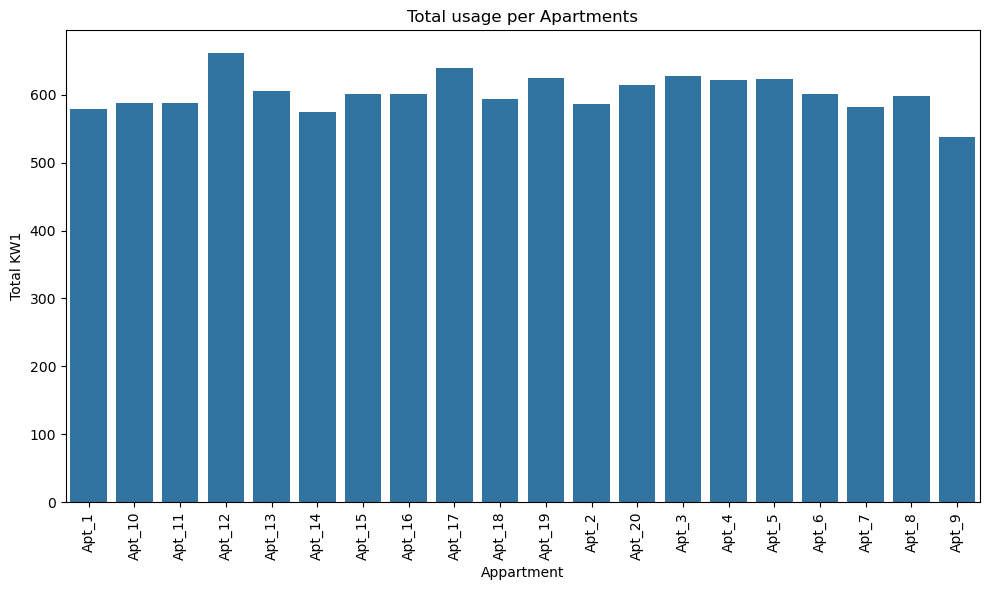

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x=usage_per_apartment.index, y= usage_per_apartment.values)
plt.xticks(rotation=90)
plt.title("Total usage per Apartments")
plt.xlabel("Appartment")
plt.ylabel("Total KW1")
plt.tight_layout()
plt.show()

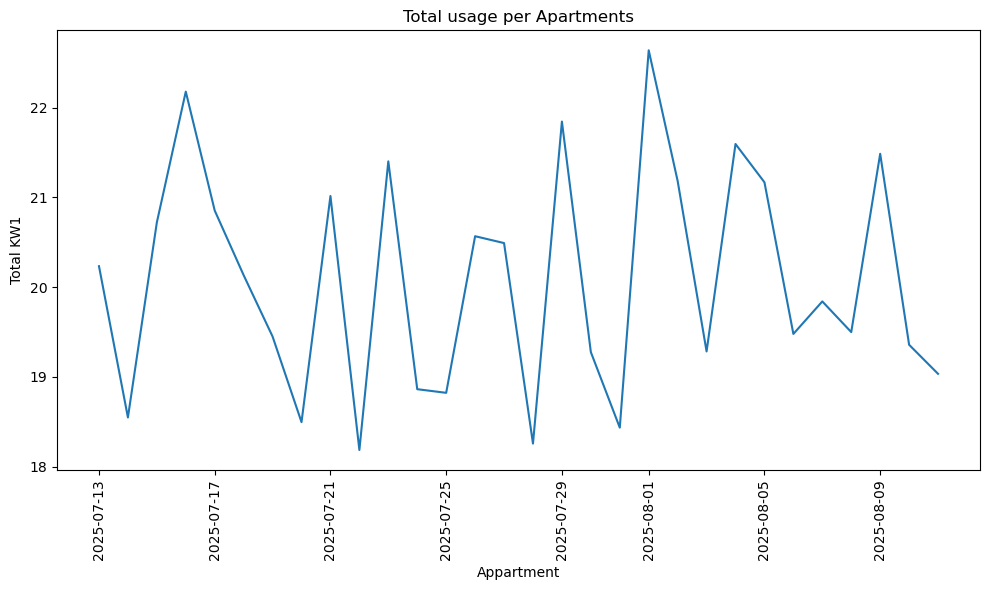

In [18]:
daily_avg = df.groupby('Apartment')['Electricity_usage'].mean()
df['Date'] = pd.to_datetime(df['Date'])  # Ensure Date column is in datetime format
daily_avg = df.groupby('Date')['Electricity_usage'].mean()

plt.figure(figsize=(10,6))
sns.lineplot(x = daily_avg.index, y = daily_avg.values)
plt.xticks(rotation=90)
plt.title("Total usage per Apartments")
plt.xlabel("Appartment")
plt.ylabel("Total KW1")
plt.tight_layout()
plt.show()

In [19]:
thresholds=df["Electricity_usage"].mean()+2 *df["Electricity_usage"].std()
df["High_usage_flag"]=df["Electricity_usage"] > thresholds
print(df[df["High_usage_flag"] == True].head())

          Date Apartment  Electricity_usage  High_usage_flag
16  2025-07-29     Apt_1          31.310920             True
41  2025-07-24     Apt_2          30.270560             True
46  2025-07-29     Apt_2          31.044311             True
112 2025-08-04     Apt_4          31.048161             True
139 2025-08-01     Apt_5          32.986147             True
